In [11]:
# 📌 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_excel(r'E:\c drive\amazon\data\online_retail\online_retail_II.xlsx', parse_dates=['InvoiceDate'])


In [13]:
print(df.shape)
print(df.columns)
print(df.head())
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

(525461, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [14]:
# Check column names first
print(df.columns)

# ✅ Make sure these two columns exist
assert 'Quantity' in df.columns, "Missing 'Quantity'"
assert 'Price' in df.columns, "Missing 'Price'"

# ✅ Create TotalSum if not already present
df['TotalSum'] = df['Quantity'] * df['Price']

# ✅ Confirm it's added
print("✅ TotalSum created:", 'TotalSum' in df.columns)




Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
✅ TotalSum created: True


In [15]:
import numpy as np

# 📌 Set snapshot date as the day after the last invoice
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# 📊 Create RFM metrics
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                     # Frequency
    'TotalSum': 'sum'                                         # Monetary
}).reset_index()

# ✅ Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalSum': 'Monetary'
}, inplace=True)

# 🔍 View the result
print(rfm.head())





   Customer ID  Recency  Frequency  Monetary
0      12346.0      165         11    372.86
1      12347.0        3          2   1323.32
2      12348.0       74          1    222.16
3      12349.0       43          3   2671.14
4      12351.0       11          1    300.93


In [16]:
print(rfm.columns)


Index(['Customer ID', 'Recency', 'Frequency', 'Monetary'], dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


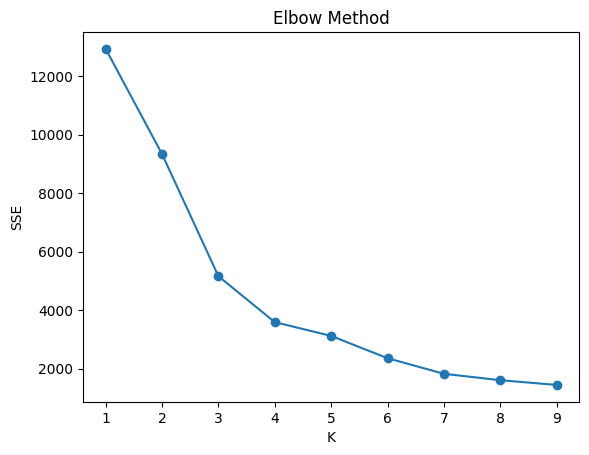

In [18]:
# 📌 6. Elbow Method to choose K
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [19]:
# 📌 7. Final Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

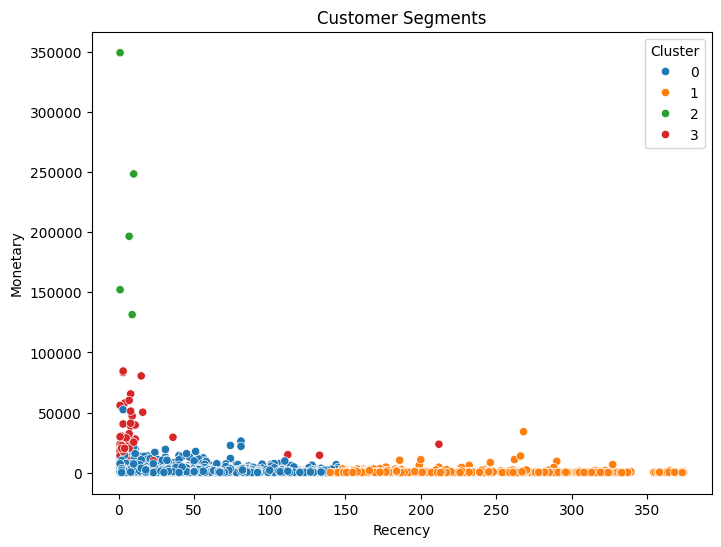

,Customer ID,Recency,Frequency,Monetary
Cluster,,,,
0,15333.5,43.0,4.5,1743.1
1,15404.5,243.0,1.7,596.9
2,15101.8,5.6,113.6,215543.7
3,15239.6,15.4,48.5,29040.2


In [20]:
# 📌 8. Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title("Customer Segments")
plt.show()

# 📌 9. Summary of Segments
cluster_summary = rfm.groupby('Cluster').mean().round(1)
display(cluster_summary)

In [1]:
#customer retention insight by offering promotions and discounts 

In [ ]:
#hourly ordered data pattern to operational teams for arranging delivery boys and intimating partner restaurants for them to do the needful at the end .

In [ ]:
#customer usage , customer personal profile (housewife buying grocery student buying stationary construc company buying hardwares),to pitch associated items to customers who is buying some product frequently (coke ordering continously then suggets chips )

In [ ]:
#decision making to show to the boss (for pitching associated products) 